## Import Requirement Library

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

## Extract dataset

In [2]:
zip_path = '.\dataset.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('dataset')
zip_ref.close()


In [3]:
import os

base_dir = 'dataset\dataset'
pet_dir = os.path.join(base_dir,'pet')
hdpe_dir = os.path.join(base_dir,'hdpe')
ldpe_dir = os.path.join(base_dir,'ldpe')
ps_dir = os.path.join(base_dir,'ps')
pp_dir = os.path.join(base_dir,'pp')
pvc_dir = os.path.join(base_dir,'pvc')
other_dir = os.path.join(base_dir,'other')

print('Total file in pet dir {}'.format(len(os.listdir(pet_dir))))
print('Total file in hdpe dir {}'.format(len(os.listdir(hdpe_dir))))
print('Total file in ldpe dir {}'.format(len(os.listdir(ldpe_dir))))
print('Total file in ps dir {}'.format(len(os.listdir(ps_dir))))
print('Total file in pp dir {}'.format(len(os.listdir(pp_dir))))
print('Total file in pvc dir {}'.format(len(os.listdir(pvc_dir))))
print('Total file in other dir {}'.format(len(os.listdir(other_dir))))

pet_files= os.listdir(pet_dir)
print(pet_files[:10])

hdpe_files= os.listdir(hdpe_dir)
print(hdpe_files[:10])

ldpe_files= os.listdir(ldpe_dir)
print(ldpe_files[:10])

ps_files= os.listdir(ps_dir)
print(ps_files[:10])

pp_files= os.listdir(pp_dir)
print(pp_files[:10])

pvc_files= os.listdir(pvc_dir)
print(pvc_files[:10])

other_files= os.listdir(other_dir)
print(other_files[:10])


Total file in pet dir 156
Total file in hdpe dir 155
Total file in ldpe dir 109
Total file in ps dir 75
Total file in pp dir 74
Total file in pvc dir 105
Total file in other dir 63
['pet_0_1_11zon.png', 'pet_100_101_11zon.png', 'pet_101_102_11zon.png', 'pet_102_103_11zon.png', 'pet_103_104_11zon.png', 'pet_104_105_11zon.png', 'pet_105_106_11zon.png', 'pet_106_107_11zon.png', 'pet_107_108_11zon.png', 'pet_108_109_11zon.png']
['hdpe_0_1_11zon.png', 'hdpe_100_101_11zon.png', 'hdpe_101_102_11zon.png', 'hdpe_102_103_11zon.png', 'hdpe_103_104_11zon.png', 'hdpe_104_105_11zon.png', 'hdpe_105_106_11zon.png', 'hdpe_106_107_11zon.png', 'hdpe_107_108_11zon.png', 'hdpe_108_109_11zon.png']
['ldpe_0_1_11zon.png', 'ldpe_100_101_11zon.png', 'ldpe_101_102_11zon.png', 'ldpe_102_103_11zon.png', 'ldpe_103_104_11zon.png', 'ldpe_104_105_11zon.png', 'ldpe_105_106_11zon.png', 'ldpe_106_107_11zon.png', 'ldpe_107_108_11zon.png', 'ldpe_108_109_11zon.png']
['ps_0_1_11zon.png', 'ps_10_11_11zon.png', 'ps_11_12_11zon

## Visualize some dataset

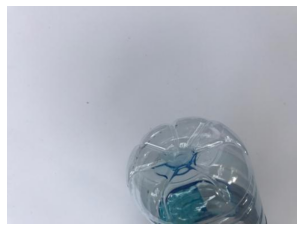

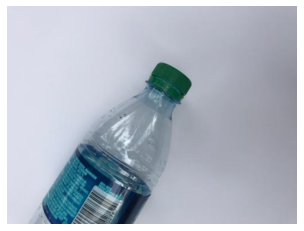

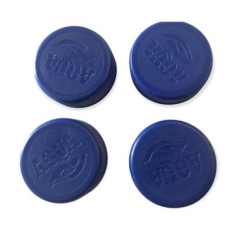

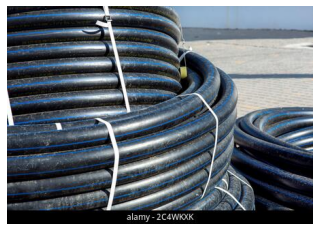

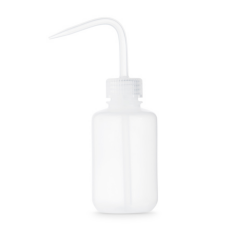

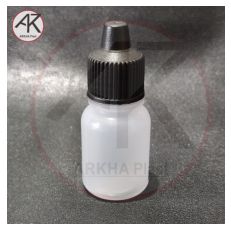

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_pet = [os.path.join(pet_dir, fname) for fname in pet_files[pic_index-2:pic_index]]
next_hdpe = [os.path.join(hdpe_dir, fname)for fname in hdpe_files[pic_index-2:pic_index]]
next_ldpe = [os.path.join(ldpe_dir, fname) for fname in ldpe_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_pet+next_hdpe+next_ldpe):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()



## Create Train and Val Directory

In [5]:
root_dir = './dataset/tmp_dataset'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path,'validation'))
    os.makedirs(os.path.join(root_path,'validation','pet'))
    os.makedirs(os.path.join(root_path,'validation','ldpe'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe'))    
    os.makedirs(os.path.join(root_path,'validation','ps'))    
    os.makedirs(os.path.join(root_path,'validation','pp'))
    os.makedirs(os.path.join(root_path,'validation','pet'))        
    os.makedirs(os.path.join(root_path,'validation','other')) 
    
    os.makedirs(os.path.join(root_path,'training'))
    os.makedirs(os.path.join(root_path,'training','pet'))
    os.makedirs(os.path.join(root_path,'training','ldpe'))    
    os.makedirs(os.path.join(root_path,'training','hdpe'))    
    os.makedirs(os.path.join(root_path,'training','ps'))    
    os.makedirs(os.path.join(root_path,'training','pp'))
    os.makedirs(os.path.join(root_path,'training','pet'))        
    os.makedirs(os.path.join(root_path,'training','other'))  

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

You should not be seeing this since the upper directory is removed beforehand


In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./dataset/tmp_dataset\validation
./dataset/tmp_dataset\validation\hdpe
./dataset/tmp_dataset\validation\ldpe
./dataset/tmp_dataset\validation\pet
./dataset/tmp_dataset\validation\pp
./dataset/tmp_dataset\validation\ps


In [7]:
root_dir = './dataset/tmp_dataset'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
    
    os.makedirs(os.path.join(root_path,'validation','pet'))
    os.makedirs(os.path.join(root_path,'validation','hdpe'))
    os.makedirs(os.path.join(root_path,'validation','ldpe'))
    os.makedirs(os.path.join(root_path,'validation','pp'))
    os.makedirs(os.path.join(root_path,'validation','ps'))
    os.makedirs(os.path.join(root_path,'validation','pvc'))
    os.makedirs(os.path.join(root_path,'validation','other'))
    os.makedirs(os.path.join(root_path,'training','pet')) 
    os.makedirs(os.path.join(root_path,'training','hdpe'))
    os.makedirs(os.path.join(root_path,'training','ldpe'))
    os.makedirs(os.path.join(root_path,'training','pp'))
    os.makedirs(os.path.join(root_path,'training','ps'))
    os.makedirs(os.path.join(root_path,'training','pvc'))
    os.makedirs(os.path.join(root_path,'training','other'))
    

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [8]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./dataset/tmp_dataset\training
./dataset/tmp_dataset\validation
./dataset/tmp_dataset\training\hdpe
./dataset/tmp_dataset\training\ldpe
./dataset/tmp_dataset\training\other
./dataset/tmp_dataset\training\pet
./dataset/tmp_dataset\training\pp
./dataset/tmp_dataset\training\ps
./dataset/tmp_dataset\training\pvc
./dataset/tmp_dataset\validation\hdpe
./dataset/tmp_dataset\validation\ldpe
./dataset/tmp_dataset\validation\other
./dataset/tmp_dataset\validation\pet
./dataset/tmp_dataset\validation\pp
./dataset/tmp_dataset\validation\ps
./dataset/tmp_dataset\validation\pvc


In [9]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    len_source_dir = len(os.listdir(SOURCE_DIR))
    len_split_file = round(len_source_dir * SPLIT_SIZE)
    shuffle_file = random.sample(os.listdir(SOURCE_DIR), len_source_dir)
    
    for fname in shuffle_file[:len_split_file]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(TRAINING_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    for fname in shuffle_file[len_split_file:]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(VALIDATION_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    ## END CODE HERE
    return shuffle_file

In [10]:
PET_SOURCE_DIR = "./dataset/dataset/pet"
LDPE_SOURCE_DIR = "./dataset/dataset/ldpe"
HDPE_SOURCE_DIR = "./dataset/dataset/hdpe"
PS_SOURCE_DIR = "./dataset/dataset/ps"
PP_SOURCE_DIR = "./dataset/dataset/pp"
PVC_SOURCE_DIR = "./dataset/dataset/pvc"
OTHER_SOURCE_DIR = "./dataset/dataset/other"

TRAINING_DIR = "./dataset/tmp_dataset/training"
VALIDATION_DIR = "./dataset/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_DIR = os.path.join(TRAINING_DIR,"hdpe/")
VALIDATION_HDPE_DIR = os.path.join(VALIDATION_DIR,"hdpe/")

TRAINING_LDPE_DIR = os.path.join(TRAINING_DIR,"ldpe/")
VALIDATION_LDPE_DIR = os.path.join(VALIDATION_DIR,"ldpe/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_DIR = os.path.join(TRAINING_DIR,"pp/")
VALIDATION_PP_DIR = os.path.join(VALIDATION_DIR,"pp/")

TRAINING_PVC_DIR = os.path.join(TRAINING_DIR,"pvc/")
VALIDATION_PVC_DIR = os.path.join(VALIDATION_DIR,"pvc/")

TRAINING_OTHER_DIR = os.path.join(TRAINING_DIR,"other/")
VALIDATION_OTHER_DIR = os.path.join(VALIDATION_DIR,"other/")

split_size = .9

pet = split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
ldpe = split_data(LDPE_SOURCE_DIR, TRAINING_LDPE_DIR, VALIDATION_LDPE_DIR, split_size)
hdpe = split_data(HDPE_SOURCE_DIR, TRAINING_HDPE_DIR, VALIDATION_HDPE_DIR, split_size)
ps = split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
pp = split_data(PP_SOURCE_DIR, TRAINING_PP_DIR, VALIDATION_PP_DIR, split_size)
pvc = split_data(PVC_SOURCE_DIR, TRAINING_PVC_DIR, VALIDATION_PVC_DIR, split_size)
other = split_data(OTHER_SOURCE_DIR, TRAINING_OTHER_DIR, VALIDATION_OTHER_DIR, split_size)

print(pet)

['pet_53_54_11zon.png', 'pet_152_153_11zon.png', 'pet_62_63_11zon.png', 'pet_131_132_11zon.png', 'pet_46_47_11zon.png', 'pet_141_142_11zon.png', 'pet_50_51_11zon.png', 'pet_27_28_11zon.png', 'pet_108_109_11zon.png', 'pet_67_68_11zon.png', 'pet_106_107_11zon.png', 'pet_90_91_11zon.png', 'pet_16_17_11zon.png', 'pet_75_76_11zon.png', 'pet_92_93_11zon.png', 'pet_42_43_11zon.png', 'pet_59_60_11zon.png', 'pet_47_48_11zon.png', 'pet_104_105_11zon.png', 'pet_105_106_11zon.png', 'pet_137_138_11zon.png', 'pet_20_21_11zon.png', 'pet_73_74_11zon.png', 'pet_127_128_11zon.png', 'pet_74_75_11zon.png', 'pet_91_92_11zon.png', 'pet_48_49_11zon.png', 'pet_37_38_11zon.png', 'pet_1_2_11zon.png', 'pet_54_55_11zon.png', 'pet_98_99_11zon.png', 'pet_36_37_11zon.png', 'pet_79_80_11zon.png', 'pet_136_137_11zon.png', 'pet_121_122_11zon.png', 'pet_43_44_11zon.png', 'pet_71_72_11zon.png', 'pet_57_58_11zon.png', 'pet_21_22_11zon.png', 'pet_154_155_11zon.png', 'pet_89_90_11zon.png', 'pet_144_145_11zon.png', 'pet_17_1

In [11]:
# Test your split_data function
PET_SOURCE_DIR = "./dataset/dataset/pet"
LDPE_SOURCE_DIR = "./dataset/dataset/ldpe"
HDPE_SOURCE_DIR = "./dataset/dataset/hdpe"
PS_SOURCE_DIR = "./dataset/dataset/ps"
PP_SOURCE_DIR = "./dataset/dataset/pp"
PVC_SOURCE_DIR = "./dataset/dataset/pvc"
OTHER_SOURCE_DIR = "./dataset/dataset/other"

TRAINING_DIR = "./dataset/tmp_dataset/training"
VALIDATION_DIR = "./dataset/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_DIR = os.path.join(TRAINING_DIR,"hdpe/")
VALIDATION_HDPE_DIR = os.path.join(VALIDATION_DIR,"hdpe/")

TRAINING_LDPE_DIR = os.path.join(TRAINING_DIR,"ldpe/")
VALIDATION_LDPE_DIR = os.path.join(VALIDATION_DIR,"ldpe/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_DIR = os.path.join(TRAINING_DIR,"pp/")
VALIDATION_PP_DIR = os.path.join(VALIDATION_DIR,"pp/")

TRAINING_PVC_DIR = os.path.join(TRAINING_DIR,"pvc/")
VALIDATION_PVC_DIR = os.path.join(VALIDATION_DIR,"pvc/")

TRAINING_OTHER_DIR = os.path.join(TRAINING_DIR,"other/")
VALIDATION_OTHER_DIR = os.path.join(VALIDATION_DIR,"other/")

print(TRAINING_OTHER_DIR)
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_PET_DIR)) > 0:
    for file in os.scandir(TRAINING_PET_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_LDPE_DIR)) > 0:
    for file in os.scandir(TRAINING_LDPE_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PS_DIR)) > 0:
    for file in os.scandir(TRAINING_PS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PVC_DIR)) > 0:
    for file in os.scandir(TRAINING_PVC_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_OTHER_DIR)) > 0:
    for file in os.scandir(TRAINING_OTHER_DIR):
        os.remove(file.path)
        
if len(os.listdir(VALIDATION_PET_DIR)) > 0:
    for file in os.scandir(VALIDATION_PET_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_LDPE_DIR)) > 0:
    for file in os.scandir(VALIDATION_LDPE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PS_DIR)) > 0:
    for file in os.scandir(VALIDATION_PS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PVC_DIR)) > 0:
    for file in os.scandir(VALIDATION_PVC_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_OTHER_DIR)) > 0:
    for file in os.scandir(VALIDATION_OTHER_DIR):
        os.remove(file.path)

# Define proportion of images used for training
split_size = .9

split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
split_data(LDPE_SOURCE_DIR, TRAINING_LDPE_DIR, VALIDATION_LDPE_DIR, split_size)
split_data(HDPE_SOURCE_DIR, TRAINING_HDPE_DIR, VALIDATION_HDPE_DIR, split_size)
split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
split_data(PP_SOURCE_DIR, TRAINING_PP_DIR, VALIDATION_PP_DIR, split_size)
split_data(PVC_SOURCE_DIR, TRAINING_PVC_DIR, VALIDATION_PVC_DIR, split_size)
split_data(OTHER_SOURCE_DIR, TRAINING_OTHER_DIR, VALIDATION_OTHER_DIR, split_size)

print(f"\n\nOriginal pet's directory has {len(os.listdir(PET_SOURCE_DIR))} images")
print(f"Original hdpe's directory has {len(os.listdir(HDPE_SOURCE_DIR))} images\n")
print(f"Original ldpe's directory has {len(os.listdir(LDPE_SOURCE_DIR))} images\n")
print(f"Original ps's directory has {len(os.listdir(PS_SOURCE_DIR))} images\n")
print(f"Original pp's directory has {len(os.listdir(PP_SOURCE_DIR))} images\n")
print(f"Original pvc's directory has {len(os.listdir(PVC_SOURCE_DIR))} images\n")
print(f"Original other's directory has {len(os.listdir(OTHER_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_PET_DIR))} images of PET for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_LDPE_DIR))} images of LDPE for training")
print(f"There are {len(os.listdir(TRAINING_PS_DIR))} images of PS for training")
print(f"There are {len(os.listdir(TRAINING_PP_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PVC_DIR))} images of PVC for training")
print(f"There are {len(os.listdir(TRAINING_OTHER_DIR))} images of OTHER for training")

print(f"There are {len(os.listdir(VALIDATION_PET_DIR))} images of PET for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_LDPE_DIR))} images of LDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PS_DIR))} images of PS for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PVC_DIR))} images of PVC for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_OTHER_DIR))} images of OTHER for VALIDATION")


./dataset/tmp_dataset/training\other/


Original pet's directory has 156 images
Original hdpe's directory has 155 images

Original ldpe's directory has 109 images

Original ps's directory has 75 images

Original pp's directory has 74 images

Original pvc's directory has 105 images

Original other's directory has 63 images

There are 140 images of PET for training
There are 140 images of HDPE for training
There are 98 images of LDPE for training
There are 68 images of PS for training
There are 67 images of PP for training
There are 94 images of PVC for training
There are 57 images of OTHER for training
There are 16 images of PET for VALIDATION
There are 15 images of HDPE for VALIDATION
There are 11 images of LDPE for VALIDATION
There are 7 images of PS for VALIDATION
There are 7 images of PP for VALIDATION
There are 11 images of PVC for VALIDATION
There are 6 images of OTHER for VALIDATION


In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')  
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                              batch_size=45,
                                              class_mode='binary',
                                              target_size=(150, 150))
    validation_datagen = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')  
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=45,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
    return train_generator,validation_generator

In [14]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

print(train_generator)
label_map = (train_generator.class_indices)

Found 664 images belonging to 7 classes.
Found 73 images belonging to 7 classes.


In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator)

Epoch 1/50
15/15 [==============================] - 44s 3s/step - loss: 1.9473 - accuracy: 0.1596 - val_loss: 1.8908 - val_accuracy: 0.2055
Epoch 2/50
15/15 [==============================] - 39s 3s/step - loss: 1.9204 - accuracy: 0.1928 - val_loss: 1.8995 - val_accuracy: 0.2055
Epoch 3/50
15/15 [==============================] - 39s 3s/step - loss: 1.9291 - accuracy: 0.2259 - val_loss: 1.9061 - val_accuracy: 0.2466
Epoch 4/50
15/15 [==============================] - 38s 2s/step - loss: 1.9000 - accuracy: 0.2380 - val_loss: 1.9541 - val_accuracy: 0.2055
Epoch 5/50
15/15 [==============================] - 40s 3s/step - loss: 1.8772 - accuracy: 0.2636 - val_loss: 1.8079 - val_accuracy: 0.3425
Epoch 6/50
15/15 [==============================] - 41s 3s/step - loss: 1.8219 - accuracy: 0.3253 - val_loss: 1.8639 - val_accuracy: 0.3151
Epoch 7/50
15/15 [==============================] - 39s 2s/step - loss: 1.8367 - accuracy: 0.3072 - val_loss: 1.7999 - val_accuracy: 0.3151
Epoch 8/50
15/15 [==

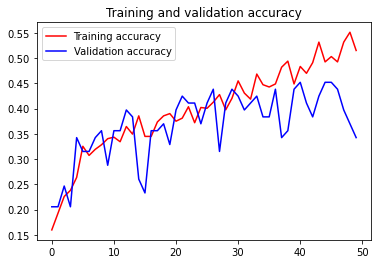

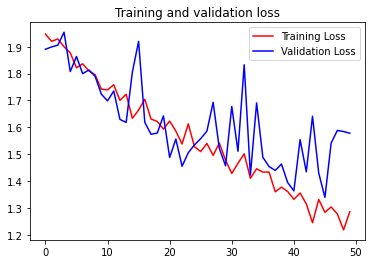

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
!pip install ipywidgets
!pip install Pillow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


FileUpload(value={}, description='Upload')

Button(description='Upload', style=ButtonStyle())

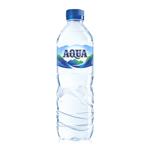

1/1 [==============================] - 0s 29ms/step
Filename: 2813315_de7f5970-05d7-4f5b-8b63-0c0c5e8a6af3_500_500.jpg
Classes: [[1. 0. 0. 0. 0. 0. 0.]]


In [67]:
from IPython.display import display
import ipywidgets as widgets
import io
from PIL import Image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array, load_img

upload_widget = widgets.FileUpload()
display(upload_widget)

def on_upload_button_clicked(change):
    uploaded_image = upload_widget.value[list(upload_widget.value.keys())[0]]['content']
    pil_image = Image.open(io.BytesIO(uploaded_image))
    resized_image = pil_image.resize((150, 150))

    display(resized_image)

    x = img_to_array(resized_image)

    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)

    filename = list(upload_widget.value.keys())[0]
    print("Filename:", filename)
    print("Classes:", classes)

upload_button = widgets.Button(description="Upload")
upload_button.on_click(on_upload_button_clicked)

# Display the button
display(upload_button)


In [64]:
label_map = (train_generator.class_indices)
print(label_map)

{'hdpe': 0, 'ldpe': 1, 'other': 2, 'pet': 3, 'pp': 4, 'ps': 5, 'pvc': 6}
